In [1]:
# First step, import libraries and then dataset
import numpy as np 
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
import os 

In [2]:
df = pd.read_csv("/Users/salonikhanna/Desktop/FINAL PROJECT/btc-data.csv") 
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()
#print(Real_Price.shape)

In [3]:
# We will predict the prices for 50 days, so splitting the data accordingly
prediction_days = 50
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [4]:
# Some preprocessing, like normalizing the values, reshaping, etc. The data is a time series data, so the output to every instance is the next instance. 
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

**Part 1: Using Long short-term memory (LSTM) network **

In [24]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU, RNN

# Initialising 
regressor = Sequential()

# Adding the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling using Adam optimizaer and MSE loss
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the LSTM to the Training set
regressor.fit(X_train, y_train, batch_size = 15, epochs = 50)

Epoch 1/50
222/222 [==============================] - 3s 4ms/step - loss: 0.0155
Epoch 2/50
222/222 [==============================] - 1s 4ms/step - loss: 0.0136
Epoch 3/50
222/222 [==============================] - 1s 5ms/step - loss: 0.0118
Epoch 4/50
222/222 [==============================] - 1s 5ms/step - loss: 0.0102
Epoch 5/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0085
Epoch 6/50
222/222 [==============================] - 1s 4ms/step - loss: 0.0068
Epoch 7/50
222/222 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 8/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0036
Epoch 9/50
222/222 [==============================] - 1s 6ms/step - loss: 0.0024
Epoch 10/50
222/222 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 11/50
222/222 [==============================] - 2s 7ms/step - loss: 8.1793e-04A:
Epoch 12/50
222/222 [==============================] - 1s 6ms/step - loss: 4.1879e-04
Epoch 13/50
222

In [25]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price_lstm = regressor.predict(inputs)
predicted_BTC_price_lstm = sc.inverse_transform(predicted_BTC_price_lstm)
er1 = np.mean((predicted_BTC_price_lstm-test_set)**2)
print("Mean Square Error (MSE) using LSTM:", er1)

ValueError: cannot reshape array of size 200 into shape (50,1)

ValueError: cannot insert level_0, already exists

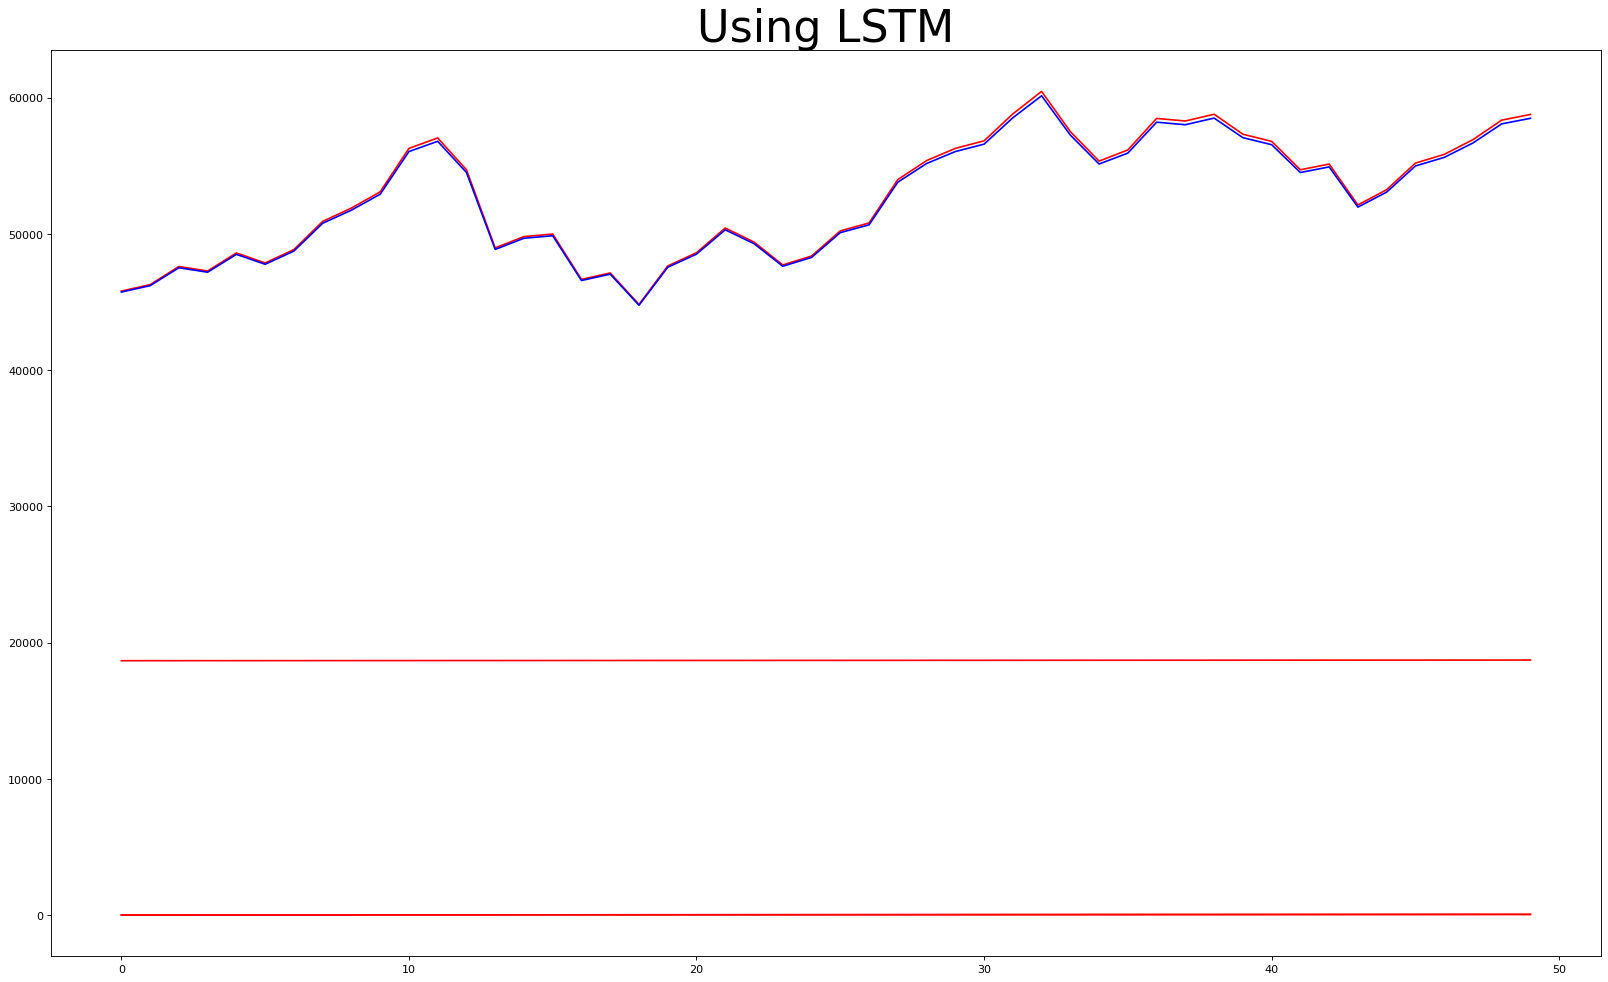

In [23]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('Using LSTM', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()


**Part 2: Using Gated Recurrent Units (GRU) **

In [9]:
# Initialising
regressor2 = Sequential()

# Adding the GRU layer
regressor2.add(GRU(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor2.add(Dense(units = 1))

# Compiling the GRU using Adam optimizer and MSE loss
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the GRU to the Training set
regressor2.fit(X_train, y_train, batch_size = 15, epochs = 50)

Epoch 1/50
222/222 [==============================] - 3s 4ms/step - loss: 0.0289
Epoch 2/50
222/222 [==============================] - 1s 4ms/step - loss: 0.0124
Epoch 3/50
222/222 [==============================] - 1s 4ms/step - loss: 0.0098
Epoch 4/50
222/222 [==============================] - 1s 4ms/step - loss: 0.0075
Epoch 5/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 6/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0035
Epoch 7/50
222/222 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 8/50
222/222 [==============================] - 1s 4ms/step - loss: 9.9854e-04
Epoch 9/50
222/222 [==============================] - 1s 5ms/step - loss: 4.2880e-04
Epoch 10/50
222/222 [==============================] - 1s 4ms/step - loss: 1.7066e-04
Epoch 11/50
222/222 [==============================] - 1s 4ms/step - loss: 7.7608e-05
Epoch 12/50
222/222 [==============================] - 1s 4ms/step - loss: 5.0700e-05
Epoch

In [10]:
# Prediction from the trained GRU network
predicted_BTC_price_gru = regressor2.predict(inputs)
predicted_BTC_price_gru = sc.inverse_transform(predicted_BTC_price_gru)
er2 = np.mean((predicted_BTC_price_gru-test_set)**2)
print("Mean Square Error (MSE) using GRU:", er2)

Mean Square Error (MSE) using GRU: 34418502.42533696


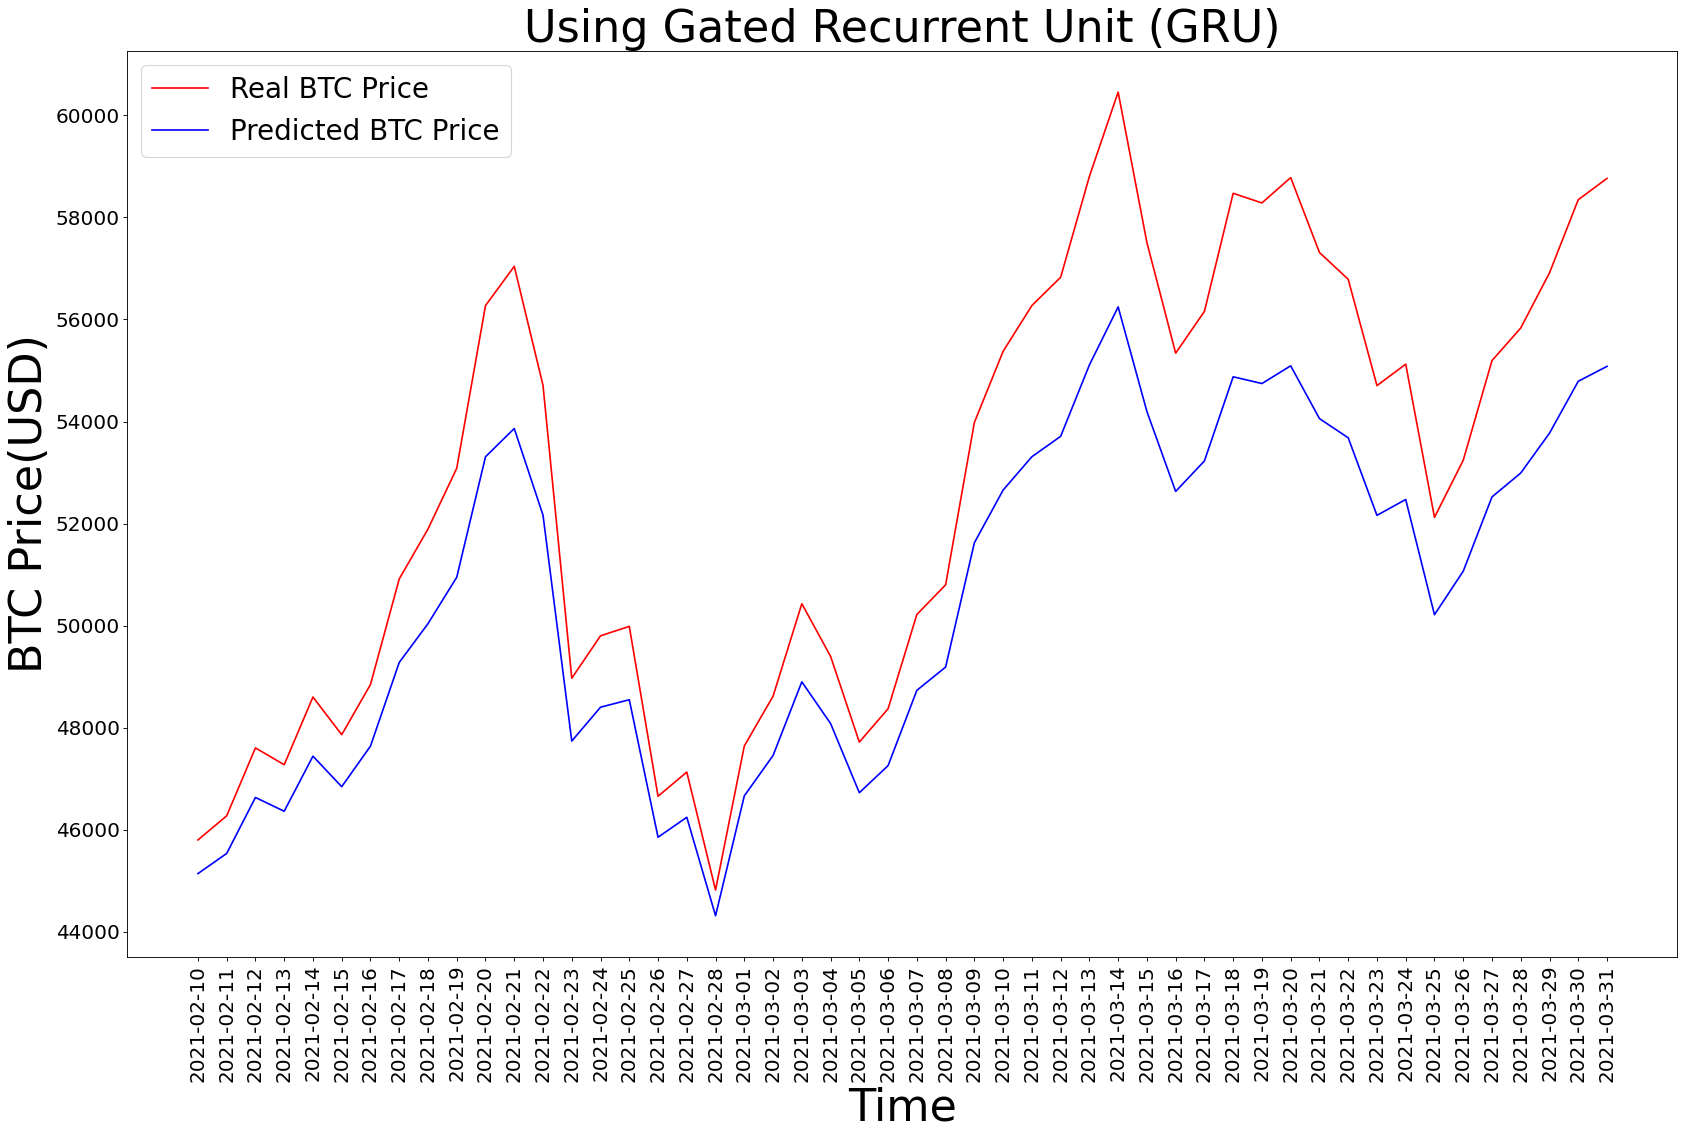

In [11]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('Using Gated Recurrent Unit (GRU)', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

**Part 3: Using Simple RNN**

In [13]:
# Initialising the RNN
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN
regressor4 = Sequential()

# Adding the simple RNN
regressor4.add(SimpleRNN(units = 4, activation='sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor4.add(Dense(units = 1))

# Compiling the RNN
regressor4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor4.fit(X_train, y_train, batch_size = 15, epochs = 50)

Epoch 1/50
222/222 [==============================] - 2s 4ms/step - loss: 0.1809
Epoch 2/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0163
Epoch 3/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0107
Epoch 4/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0092
Epoch 5/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0080
Epoch 6/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0068
Epoch 7/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0057
Epoch 8/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 9/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0038
Epoch 10/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0030
Epoch 11/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 12/50
222/222 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 13/50
222/222 [====

Mean Square Error (MSE) using RNN: 56933984.15211313


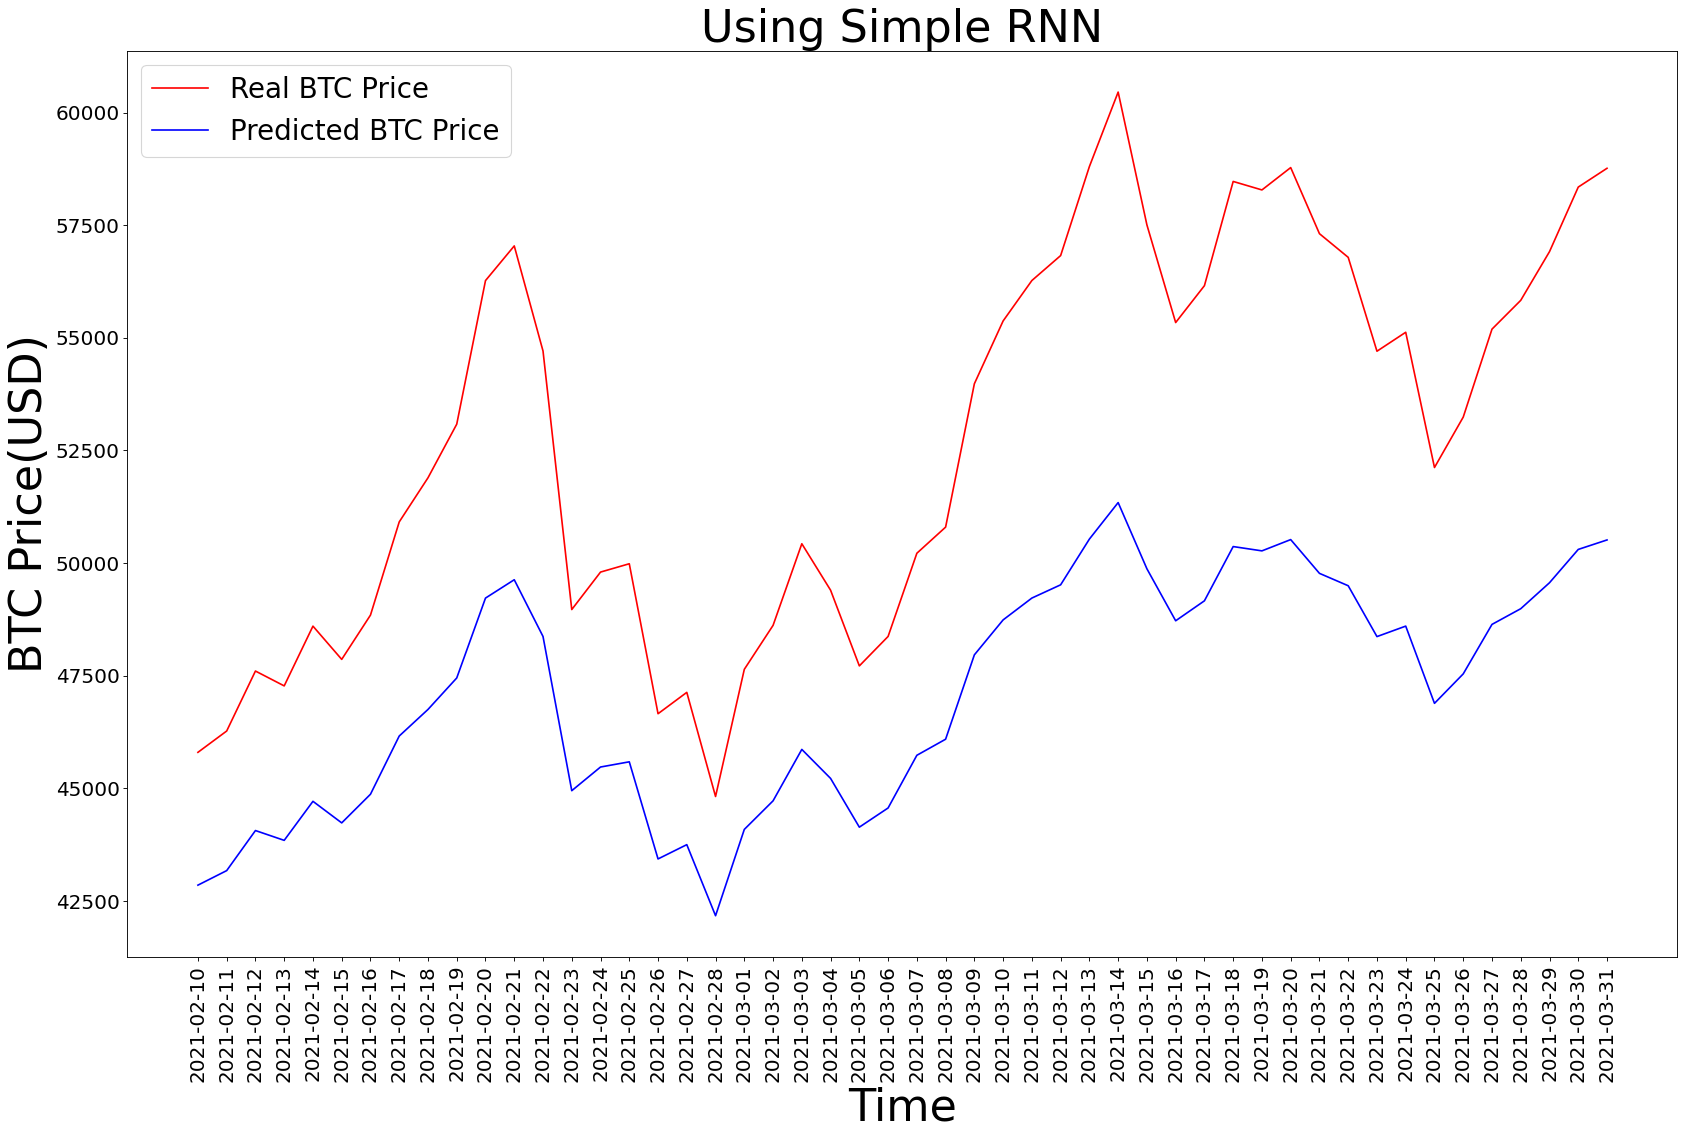

In [14]:
predicted_BTC_price = regressor4.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)
er4 = np.mean((predicted_BTC_price-test_set)**2)
print("Mean Square Error (MSE) using RNN:", er4)
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('Using Simple RNN', fontsize=40)
# df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

* **Parameter tuning part:** In this section I am just experimenting with difference possible hyperparameters for the different models to select the best set. This section can be ignored once you have the best set of parameters.

Epoch 1/50
222/222 [==============================] - 3s 5ms/step - loss: 0.0084
Epoch 2/50
222/222 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 3/50
222/222 [==============================] - 1s 5ms/step - loss: 1.9464e-04
Epoch 4/50
222/222 [==============================] - 1s 5ms/step - loss: 4.7142e-05
Epoch 5/50
222/222 [==============================] - 1s 5ms/step - loss: 4.6510e-05
Epoch 6/50
222/222 [==============================] - 1s 4ms/step - loss: 4.5236e-05
Epoch 7/50
222/222 [==============================] - 1s 4ms/step - loss: 4.5427e-05
Epoch 8/50
222/222 [==============================] - 1s 4ms/step - loss: 4.5834e-05
Epoch 9/50
222/222 [==============================] - 1s 4ms/step - loss: 4.5036e-05
Epoch 10/50
222/222 [==============================] - 1s 5ms/step - loss: 5.1860e-05
Epoch 11/50
222/222 [==============================] - 1s 5ms/step - loss: 5.2340e-05
Epoch 12/50
222/222 [==============================] - 1s 5ms/step - lo

Mean Square Error (MSE) using GRU2: 37028901.13075303


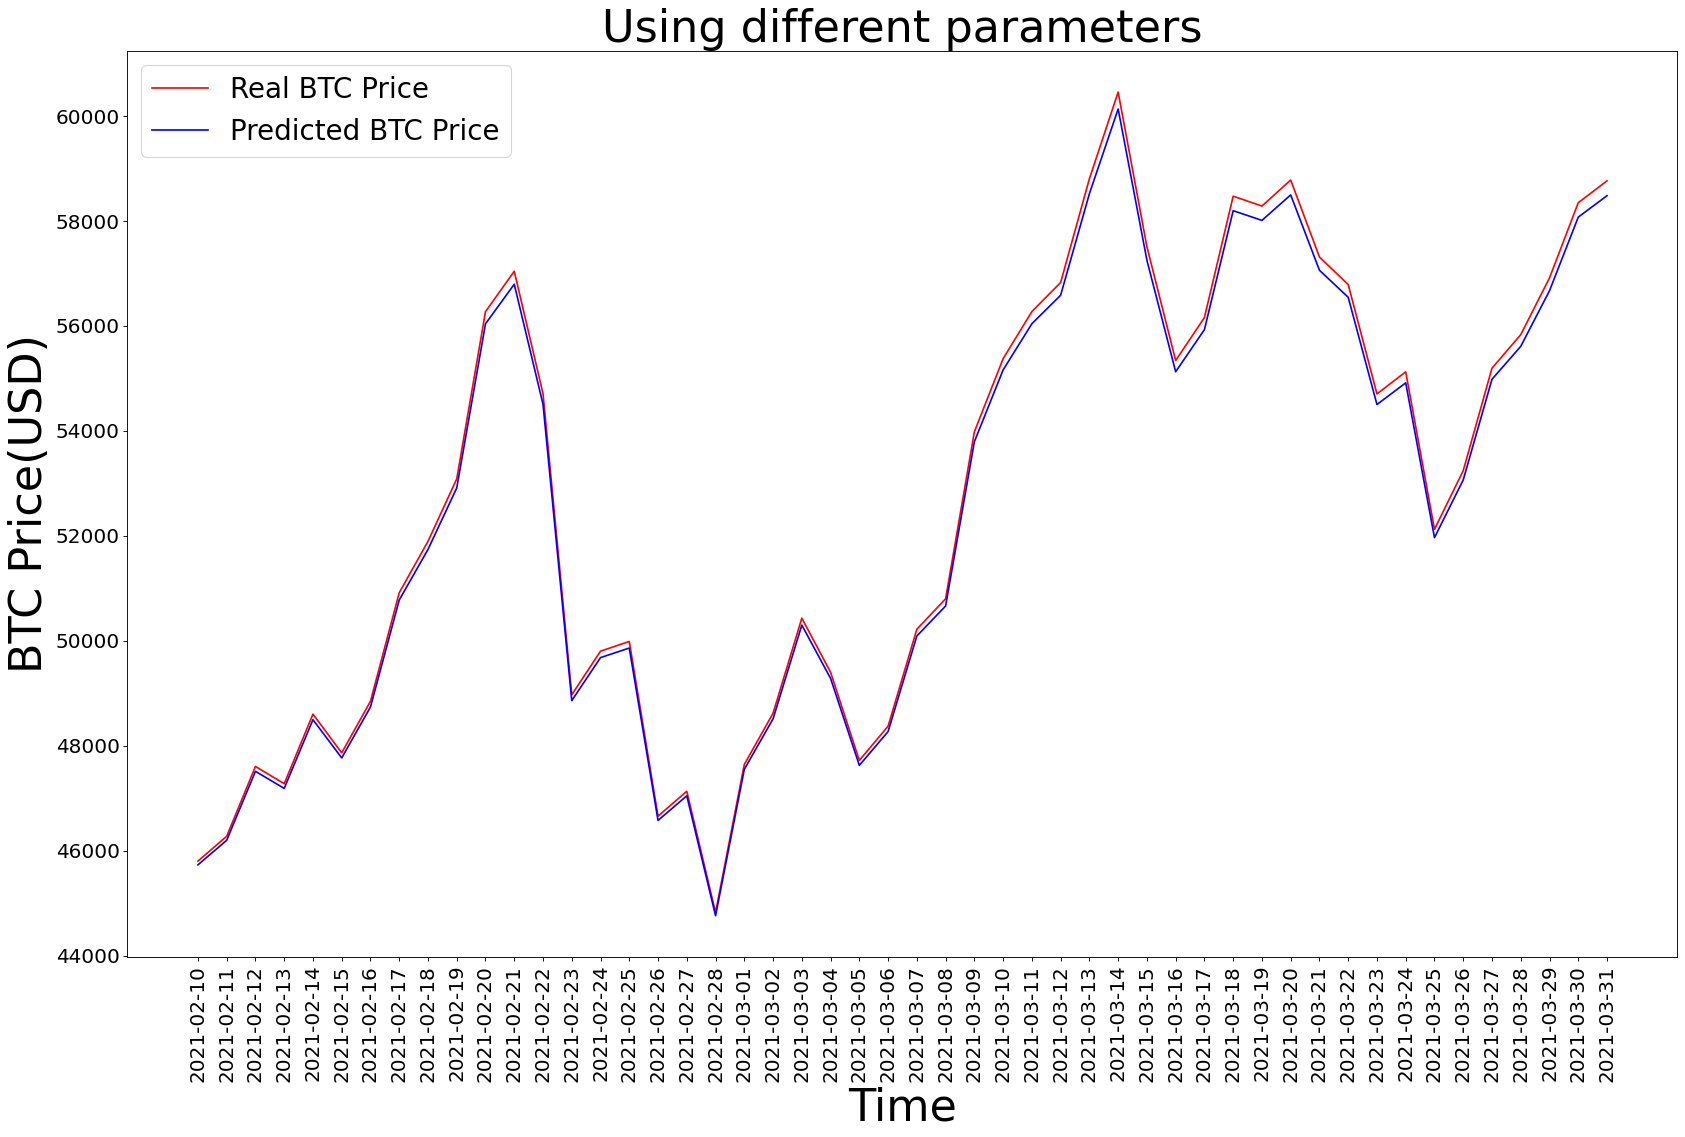

In [16]:
predicted_BTC_price = regressor5.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)
er5 = np.mean((predicted_BTC_price-test_set)**2)
print("Mean Square Error (MSE) using GRU2:", er5)

# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('Using different parameters', fontsize=40)
# df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [17]:
res = pd.DataFrame()
res['Model'] = ['Simple RNN', 'LSTM', 'GRU']
res['Mean Square Error'] = [er4,er1,er2]

print(res)


        Model  Mean Square Error
0  Simple RNN       5.693398e+07
1        LSTM       5.345650e+07
2         GRU       3.441850e+07
